In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LogisticRegression
# Support vector machine linear classifier
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
# from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report, precision_score, recall_score

In [99]:
# Read in full dataset
all_songs_df = pd.read_csv('../Resources/all_songs_final.csv')

In [100]:
df1960s = all_songs_df[all_songs_df['decade']=='1960s']

In [75]:
data = df1960s[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]

target = df1960s["billboard"]
target_names = ["not_a_hit", "hit"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

(3611, 10)

In [77]:
# oversample = SMOTE(random_state=0, sampling_strategy=0.8)
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [78]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Support vector machine linear classifier
from sklearn.svm import SVC 

modelsc = SVC(kernel='rbf', probability=True, class_weight='balanced')
modelsc.fit(X_train_scaled, y_train)

# Model Accuracy
print('Scaled Test Acc: %.3f' % modelsc.score(X_test_scaled, y_test))

In [101]:
recall_score()

TypeError: recall_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [79]:
# cv = GridSearchCV(SVC(), params)
pipe.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [102]:
# Evaluate performance
pipe.score(X_test, y_test)


from joblib import Parallel, delayed
import joblib
import pickle
  
fname = './1960s_predictor.pickle'
# Save the model as a pickle in a file
# joblib.dump(pipe, fname)
loaded_model = pickle.load(open(fname, "rb"))

# # Use the loaded pickled model to make predictions
loaded_model.predict(X_test)

UnpicklingError: invalid load key, '\x03'.

In [105]:
# file name, I'm using *.joblib as a file extension
filename = "../ML_models/1960s_predictor.pickle"

# save model
# joblib.dump(pipe, filename)

# load model
loaded_model = joblib.load(filename)

# you can use loaded model to compute predictions
y_predicted = loaded_model.predict([test_song])

In [187]:
def predict_decade(track_features, decade):
    file_path = "../ML_models/"
    file_names = {"1960s": "1960s_predictor.pickle",
                "1970s": "1970s_predictor.pickle",
                "1980s": "1980s_predictor.pickle",
                "1990s": "1990s_predictor.pickle",
                "2000s": "2000s_predictor.pickle",
                "2010s": "2010s_predictor.pickle"}
    

    # load saved model
    with open('model_1960s', 'rb') as f:
        loaded_model = pickle.load(f)
    # check prediction

    # lr.predict([[5000]]) # similar

    # load model
    # loaded_model = joblib.load(f"{file_path}{file_names[decade]}")

    # you can use loaded model to compute predictions
    y_predict = loaded_model.predict([track_features])
    y_pred_proba = loaded_model.predict_proba([track_features])

    if y_predict[0] == 1:
        billboard_prob = round(y_pred_proba[0][0], 3) * 100
        noncharting_prob = round(y_pred_proba[0][1],3) * 100
    else:
        billboard_prob = round(y_pred_proba[0][1], 3) * 100
        noncharting_prob = round(y_pred_proba[0][0],3) * 100

    
    print(f"Billboard Top 100: {billboard_prob}%\nNot Charting: {noncharting_prob}%")


In [188]:
test_song = [0.557,
 0.54,
#  9,
 -10.484,
#  1,
 0.0347,
 0.0339,
 0.00248,
 0.179,
 0.394,
 129.171,
 185733]

# "danceability": 0.557,
#   "energy": 0.54,
# #   "key": 9,
#   "loudness": -10.484,
# #   "mode": 1,
#   "speechiness": 0.0347,
#   "acousticness": 0.0339,
#   "instrumentalness": 0.00248,
#   "liveness": 0.179,
#   "valence": 0.394,
#   "tempo": 129.171,

# "danceability": 0.369,
#   "energy": 0.403,
#   "key": 3,
#   "loudness": -7.996,
#   "mode": 1,
#   "speechiness": 0.0259,
#   "acousticness": 0.827,
#   "instrumentalness": 0.0541,
#   "liveness": 0.106,
#   "valence": 0.177,
#   "tempo": 154.899,

predict_decade(test_song, "1960s")

FileNotFoundError: [Errno 2] No such file or directory: 'model_1960s'

In [153]:
y_predsc = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_predsc)
print(cm)

[[1471  701]
 [ 224 1215]]


In [64]:
f1_score(y_test, y_predsc)
precision_score(y_test, y_predsc)

0.634133611691023

In [97]:
recall_score(y_test, y_predsc)

0.8443363446838082

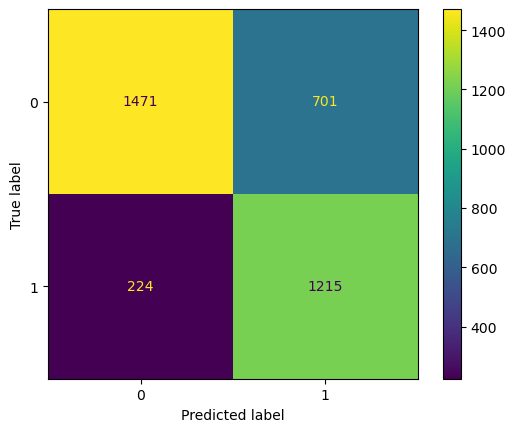

In [65]:
ConfusionMatrixDisplay(cm).plot()

In [99]:
import seaborn as sn
import matplotlib.pyplot as plt

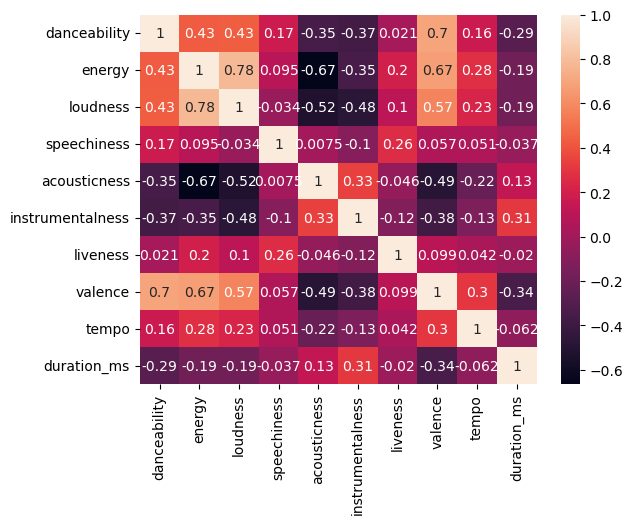

In [100]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='year'>

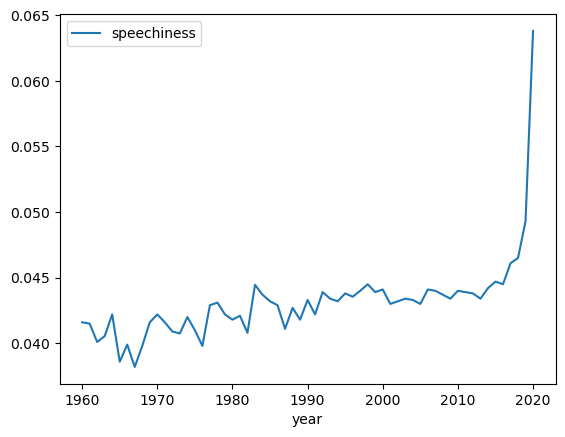

In [67]:
danceability_df = all_songs_df[all_songs_df["billboard"]==0].groupby(["year"], as_index=False).median()

danceability_df.plot("year", "speechiness")

In [6]:
df1960s.groupby("year", as_index=False).median()

,year,peak-rank,weeks-on-board,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,billboard
0,1960,0.0,0.0,0.3780,0.2360,5.0,-15.4840,1.0,0.04060,0.8950,0.011600,0.1520,0.3320,107.5340,180560.0,4.0,0.0
1,1961,0.0,0.0,0.4080,0.2570,5.0,-15.7560,1.0,0.04110,0.9060,0.375500,0.1420,0.3505,104.5770,183960.0,4.0,0.0
2,1962,0.0,0.0,0.4025,0.2365,5.0,-15.2430,1.0,0.03980,0.9265,0.055100,0.1420,0.3550,104.0855,177326.5,4.0,0.0
3,1963,0.0,0.0,0.4635,0.2890,5.0,-13.9540,1.0,0.04030,0.8490,0.000207,0.1480,0.4695,107.4260,174620.5,4.0,0.0
4,1964,0.0,0.0,0.4110,0.2975,5.0,-14.3055,1.0,0.04190,0.8490,0.000340,0.1555,0.4120,106.8575,184133.0,4.0,0.0
5,1965,0.0,0.0,0.4710,0.3640,5.0,-12.1100,1.0,0.03840,0.7370,0.000101,0.1440,0.5220,113.4980,170893.0,4.0,0.0
6,1966,0.0,0.0,0.4665,0.3220,5.0,-13.6935,1.0,0.03975,0.7655,0.000446,0.1330,0.4955,109.7910,170533.0,4.0,0.0
7,1967,0.0,0.0,0.4910,0.4060,5.0,-11.8130,1.0,0.03800,0.6740,0.000021,0.1490,0.5450,115.0680,175360.0,4.0,0.0
8,1968,0.0,0.0,0.4900,0.4340,5.0,-11.1890,1.0,0.03960,0.5960,0.000196,0.1540,0.5330,113.9720,183800.0,4.0,0.0
9,1969,0.0,0.0,0.4680,0.4370,5.0,-12.1390,1.0,0.04125,0.5590,0.002640,0.1440,0.5500,112.2195,195640.0,4.0,0.0
